## Install necessary packages

In [ ]:
!pip install -U d2l

## Clone the Git resository

In [ ]:
!git clone -l -s https://github.com/awikner/awikner.github.io.git cloned-repo
%cd cloned-repo
%cd _src

## Import reservoir functions

In [1]:
from tensorflow_reservoir import *

## Generate reservoir, training data and validation data

In [2]:
num_nodes, num_steps, num_inputs, batch_size = 100, 1, 3, 256
sync_len = 50
num_tests = 50
out_reg = 1e-6
leakage = 1.0
spectral_radius = 0.5
input_weight = 1.0
seed = 10
train_samples, test_samples, transient = 1000, 100, 150
Res = Reservoir(num_inputs, num_nodes, num_steps = num_steps, dtype = tf.float64, \
                input_weight = input_weight, out_reg = out_reg, spectral_radius = spectral_radius,\
                leakage = leakage)
u_train, u_test = generate_lorenz_data(num_steps, train_samples = train_samples,\
                                       test_samples = test_samples, sync_len = sync_len,\
                                      num_tests = num_tests, transient = transient, data_seed = seed)
#u_train += 5e-3*(np.random.rand(u_train.shape[0], u_train.shape[1])*2-1)
train_iter, test_iter = get_features_targets(Res, u_train, u_test, batch_size, sync_len = sync_len)
loss = tf.keras.losses.MeanSquaredError()
trainer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
num_epochs = 3000

## Train the reservoir

KeyboardInterrupt: 

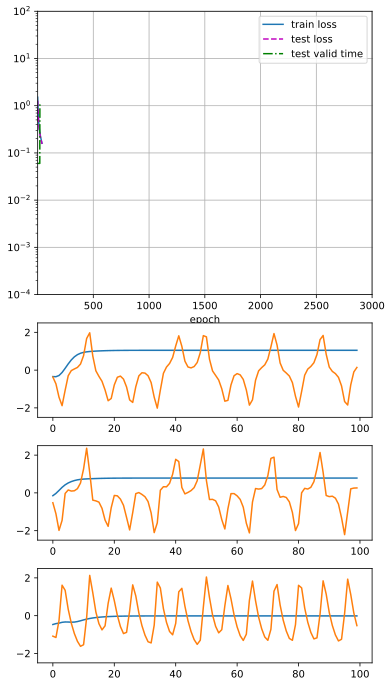

In [3]:
train_reservoir_lorenz(Res, train_iter, test_iter, loss, num_epochs, trainer, ylim = [1e-4,1e2])